# Common Distributions and Central Limit Theorem

#### DATA 1010
#### 10 Octorber 2019

---

## Problem 1

The **geometric distribution** with parameter $p \in (0,1]$ is the distribution of the index of the first success in a sequence of independent Bernoulli trials.
 
Find the probability mass function of the geometric distribution.

*Solution.* The probability mass at $k$ is equal to $(1-p)^{k-1}p$ for k from 1 to $\infty$. 

---

## Problem 2

Use Monte Carlo to approximate the mean and variance of the geometric distribution with parameter $p = 1/3$.

In [2]:
using Distributions
X = 1 .+ rand(Geometric(1/3),100_000)
mean(X)
mean((x - mean(X))^2 for x in X)

5.9171460479014755

---

## Problem 3

* Find the expected value of $S$, where $S$ is a sum of 1000
    independent Bernoulli random variables with success probability
    $p = \frac{3}{1000}$.  
* Find the probability mass function of $S$. 
    Hint: find an expression representing the probability mass at each
    $k$ from 0 to 1000, and then use Julia to evaluate it. You will
    need to define `n = big(1000)` and `p = big(3)/1000`
    because arbitrary precision arithmetic is required to avoid
    overflow issues.  
* Compare your results to the probability mass function $m(k) =
    \frac{3^k}{k!}e^{-3}$ defined on $\{0,1,2,\ldots\}$. 


*Solution.*

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


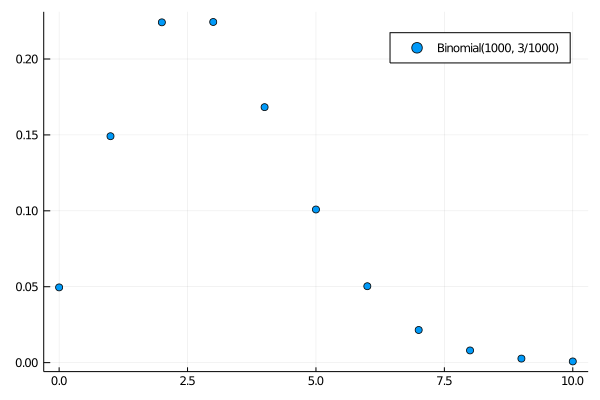

In [3]:
using Plots
n = big(1000)
p = big(3)/1000
massvalues = [binomial(n,k)*p^k*(1-p)^(n-k) for k in 0:1000]
plot(0:10, massvalues[1:11], seriestype = :scatter, label = "Binomial(1000, 3/1000)")

In [4]:
hcat(massvalues[1:11], [3^k/factorial(k)*exp(-3) for k in 0:10])

11×2 Array{BigFloat,2}:
 0.0495631    0.0497871
 0.149137     0.149361
 0.224154     0.224042
 0.224379     0.224042
 0.168284     0.168031
 0.100869     0.100819
 0.0503334    0.0504094
 0.0215065    0.021604
 0.00803259   0.00810151
 0.0026641    0.0027005
 0.000794421  0.000810151

---

## Problem 4

Suppose that the number of typos on a page is a Poisson random
  variable with mean $\lambda = \frac{1}{3}$.
  
(i) Provide an explanation for why the Poisson distribution might
    be a good approximation for the distribution of typos on a page.  
(ii) Find the probability that a particular page is typo-free. 



*Solution.* 

In [5]:
k = 0
(1/3)^k/factorial(k)*exp(-1/3)

0.7165313105737893

---

## Problem 5

The covariance of two random variables $X$ and $Y$ is defined to be $\operatorname{Cov}(X,Y) = \mathbb{E}[(X-\mathbb{E}(X))(Y-\mathbb{E}(Y))]$. 

(a) Does mass in the joint distribution of $X$ and $Y$ count positively toward the covariance of $X$ and $Y$ when it is above and to the right (northeast) of the centroid $(\mathbb{E}(X), \mathbb{E}(Y))$? What about northwest, southwest, and southeast? 

(b) Write code to sample from a distribution on two random variables $X$ and $Y$ with positive covariance. Approximate the above expression using Monte Carlo and check that it is indeed positive.

(c) The *covariance matrix* of a random vector $\mathbf{X} = [X_1, X_2]$ is defined to be $\mathbb{E}[(\mathbf{X}-\boldsymbol{\mu})(\mathbf{X}-\boldsymbol{\mu})']$, where $\boldsymbol{\mu} = [\mathbb{E}(X_1), \mathbb{E}(X_2)]$. Show that the $(i,j)$th entry of the covariance matrix is equal to the covariance of $X_i$ and $X_j$. 

*Solution.*

In [6]:
function sampleXY()
    X = rand()
    Y = -X
    (X,Y)
end
pairs = [sampleXY() for _ in 1:10_000]
xs = [x for (x,y) in pairs]
ys = [y for (x,y) in pairs]
mean((x - mean(xs))*(y - mean(ys)) for (x,y) in pairs)

-0.0837789484360828

---

## Problem 6

For each $i \in \{1,2,3\}$, the $i$th point cloud below is obtained
  by sampling 1000 times from $A_iZ + \mu_i$, where $Z$ is a vector of
  two independent normal random variables, $A_i$ is a $2 \times 2$
  matrix of constants, and $\mu_i$ is a constant vector in
  $\mathbb{R}^2$. Approximate $(A_i,\mu_i)$ for each $i \in \{1,2,3\}$. (Note: $A_i$
  is not uniquely determined, so just find an $A_i$ that works.)

  For reference, a plot of 1000 independent samples from $Z$ is shown
  in the fourth figure.
  
<center>  
    <div class="row">
        <img src="scatter1.svg" width=200>
        <img src="scatter2.svg" width=200>
        <img src="scatter3.svg" width=200>
        <img src="scatter4.svg" width=200>
    </div>
</center>

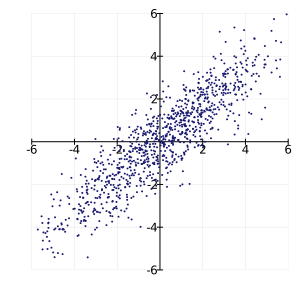

In [7]:
using Plots
gr(legend=false, frame = :origin, size = (300,300), ratio = 1)
A = [2.5 0
     2 1]
μ = [0, 0] # move the center
points = [Tuple(A * randn(2) + μ) for _ in 1:1000]
scatter(points, xlims = (-6,6), ylims = (-6,6), markersize = 1.2, markerstrokewidth = 0, color = :MidnightBlue)

---

## Problem 7

The central limit theorem says that if $S_n$ is a sum of i.i.d.
finite-variance random variables is approximately normally
distributed with mean $\mathbb{E}[S_n]$ and variance $\operatorname{Var}(S_n)$. Also,
about 95\% of the probability mass of a normal distribution is
within two standard deviations of the mean.

If a million independent $\operatorname{Unif}([a,b])$'s are added,
approximate the shortest interval containing 95\% of the probability
mass of the distribution of the resulting sum? 

In [8]:
# Exact symbolic calculation of variance:
using PyCall, SymPy
stats = pyimport("sympy.stats")
@vars a b
factor(stats.variance(stats.Uniform("U",a,b)))

       2
(a - b) 
────────
   12   

In [9]:
using Distributions
(a,b) = (3,5)
mean(abs(sum(rand(Uniform(a,b), 10^6)) - 4e6) < 1154 for _ in 1:1000)

0.957

---

## Problem 8

The multivariate central limit theorem says that if $\mathbf{X}_1,
\mathbf{X}_2, \ldots$ is an independent sequence of random vectors
with a common distribution on $\mathbb{R}^n$, then the standardized mean
$$
\mathbf{S}_n^* = \frac{\mathbf{X}_1 + \cdots + \mathbf{X}_n - n\mu}{\sqrt{n}}
$$
converges in distribution to $\mathcal{N}(\boldsymbol{0},\Sigma)$,
where $\Sigma$ is the covariance matrix of $\mathbf{X}_1$.

Investigate the multivariate central limit theorem using by making 2D
histograms for i.i.d. sums of (i) uniform samples from the square,
and (ii) samples from $((U+V)/2,V)$, where $(U,V)$ is uniformly
sampled from the square. 

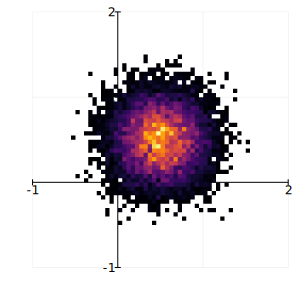

In [10]:
using Plots
function sample()
    U, V = rand(), rand()
    [U,V]
end

function standardized_sum(n)
    X_sum, Y_sum = sum(sample() for i=1:n)
    μ, ν = 1/2, 1/2
    X_stand, Y_stand = [μ, ν] + [X_sum - n*μ, Y_sum - n*μ]/sqrt(n)
    (X_stand, Y_stand)
end

n = 7
numsamples = 10000
histogram2d([standardized_sum(n) for i=1:numsamples],
            bins=(60,60),
            aspect_ratio=:equal,
            xlims=(-1,2),
            ylims=(-1,2),
            fontfamily="Palatino")